In [1]:
### Load packages

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

In [2]:
### Define environment variables

BASEDIR = "/Users/theodore/workspace/pycharm/TensorFlowUdacity"

DATADIR = os.path.join(BASEDIR, "data")
TRAINDATADIR = os.path.join(DATADIR, "notmnist", "notmnist_large")
TESTDATADIR = os.path.join(DATADIR, "notmnist", "notmnist_small")

In [3]:
### Functions for getting array of directory paths and array of file paths

def get_dir_paths(root):
  return [os.path.join(root, n) for n in sorted(os.listdir(root)) if os.path.isdir(os.path.join(root, n))]

def get_file_paths(root):
  return [os.path.join(root, n) for n in sorted(os.listdir(root)) if os.path.isfile(os.path.join(root, n))]

In [4]:
### Get directory and file paths of training and test sets

train_data_paths = get_dir_paths(TRAINDATADIR)
test_data_paths = get_dir_paths(TESTDATADIR)

In [5]:
### Problem 1

In [6]:
## Display a sample of 5 images in their initial png format

nsamples = 5

for i in np.arange(nsamples):
    display(Image(filename=np.random.choice(get_file_paths(np.random.choice(test_data_paths)))))

In [7]:
## Set image properties

image_size = 28 # Pixel width and height
pixel_depth = 255.0  # Number of levels per pixel

In [8]:
## Read a sample image

image_file = np.random.choice(get_file_paths(np.random.choice(test_data_paths)))
image_data = ndimage.imread(image_file).astype(float)

In [9]:
## Show type of image object

type(image_data)

numpy.ndarray

In [10]:
## Show dimensions of image object

image_data.shape

(28, 28)

In [11]:
## Show numeric representation of image

image_data

array([[   0.,    0.,    2.,    0.,   98.,  176.,  171.,  154.,  144.,
         144.,  147.,  163.,  168.,   44.,    0.,    2.,    0.,    1.,
           0.,  100.,  162.,  153.,  143.,  142.,  142.,  144.,  157.,
         139.],
       [   0.,    0.,    1.,    0.,   37.,  110.,  159.,  246.,  255.,
         255.,  255.,  184.,  118.,   24.,    0.,    1.,    0.,    1.,
           0.,   58.,  126.,  201.,  255.,  255.,  255.,  255.,  180.,
         114.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,  139.,  251.,
         251.,  157.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  194.,  251.,  252.,  104.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    1.,    6.,    3.,  169.,  255.,
         255.,   86.,    2.,    7.,    1.,    0.,    0.,    0.,    0.,
           0.,    3.,    5.,    7.,  210.,  255.,  253.,   42.,    2.,
           6.],
       [   0.,    0.,    0.,    0.,    1.,    0.,    4.,  215.,  255.,
         249.

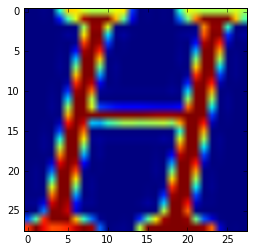

In [12]:
## Plot image using imshow

plt.imshow(image_data)
plt.show()
# display(Image(image_data))

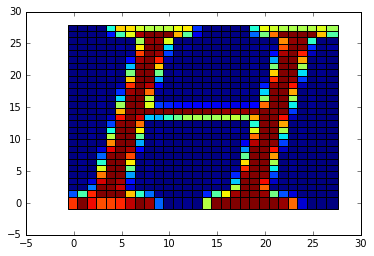

In [13]:
## Plot image using a scatterplot

colors = [str(i/pixel_depth) for i in np.ravel(image_data)]
plt.scatter(
    np.tile(np.arange(image_size), image_size),
    np.repeat(np.flipud(np.arange(image_size)), image_size),
    s=150,
    c=colors,
    marker='s'
)
plt.show()

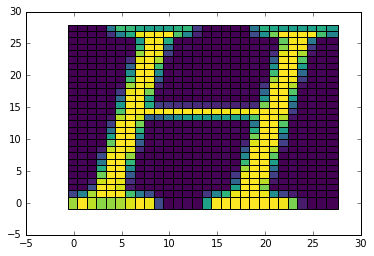

In [14]:
## Plot image using a scatterplot by setting cmap option

colors = [str(i/pixel_depth) for i in np.ravel(image_data)]
plt.scatter(
    np.tile(np.arange(image_size), image_size),
    np.repeat(np.flipud(np.arange(image_size)), image_size),
    s=150,
    c=colors,
    marker='s',
    cmap=plt.cm.viridis    
)
plt.show()

In [15]:
## Function for loading data for a single letter

def load_letter(root, image_size, pixel_depth, verbose=True, min_nimages=1):
  """Load data for a single letter."""

  if verbose:
        print(root)

  image_files = get_file_paths(root)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size), dtype=np.float32)

  image_index = 0
  for image in image_files:
    try:
      image_data = (ndimage.imread(image).astype(float)-pixel_depth/2)/pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[image_index, :, :] = image_data
      image_index += 1
    except IOError as e:
      print('Skipping because of not being able to read: ', image_file)

  dataset = dataset[0:image_index, :, :]
  if image_index < min_nimages:
    raise Exception('Fewer images than expected: %d < %d' % (image_index, min_nimages))

  if verbose:    
    print('Full dataset tensor: ', dataset.shape)
    print('Mean: ', np.mean(dataset))
    print('Standard deviation: ', np.std(dataset))

  return dataset

In [16]:
## Test load_letter() function by loading data for letter C

letter_data = load_letter(test_data_paths[2], image_size, pixel_depth)

/Users/theodore/workspace/pycharm/TensorFlowUdacity/data/notmnist/notmnist_small/C
('Full dataset tensor: ', (1873, 28, 28))
('Mean: ', -0.14152053)
('Standard deviation: ', 0.44269028)


In [17]:
## Show dimensions of loaded data for letter C

letter_data.shape

(1873, 28, 28)

In [18]:
## Show dimensions of data for the first image of letter C

letter_data[0, :, :].shape

(28, 28)

In [19]:
## Function for pickling data of all letters

def pickle_letters(root, image_size, pixel_depth, verbose=True, min_nimages=1, force=False):
  dataset_files = []
  for d in root:
    pickle_file = d + '.pickle'
    dataset_files.append(pickle_file)
    if os.path.exists(pickle_file) and not force:
      print('%s already present, skipping pickling' % pickle_file)
    else:
      print('Pickling %s' % pickle_file)
      dataset = load_letter(d, image_size, pixel_depth, verbose=verbose, min_nimages=min_nimages)
      try:
        with open(pickle_file, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
  
  return dataset_files

In [ ]:
### Pickle training set

train_datasets = pickle_letters(train_data_paths, image_size, pixel_depth)

In [ ]:
### Pickle test set

test_datasets = pickle_letters(test_data_paths, image_size, pixel_depth)

In [20]:
### Problem 2

In [21]:
## Test pickling by loading pickle for letter D

letter_data = np.load(os.path.join(DATADIR, "notmnist", "notmnist_large", "D.pickle"))

In [22]:
## Show dimensions of data loaded from pickle of letter D

letter_data.shape

(52911, 28, 28)

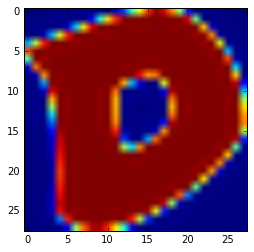

In [23]:
## Plot fifth image of letter D from loaded pickle using imshow

plt.imshow(letter_data[4, :, :])
plt.show()

In [24]:
### Problem 3

In [25]:
## Check if training sets are balanced across letter classes using absolute frequency

ntrainsets = len(train_data_paths)

train_stats = np.empty(shape=ntrainsets, dtype=np.int64)

for i in np.arange(ntrainsets):
    letter_data = np.load(".".join([train_data_paths[i], "pickle"]))
    train_stats[i] = letter_data.shape[0]

train_stats

array([52909, 52911, 52912, 52911, 52912, 52912, 52912, 52912, 52912, 52911])

In [26]:
## Check if training sets are balanced across letter classes using percentages

train_stats_perc = 100*train_stats/np.float32(sum(train_stats))

train_stats_perc

array([  9.99954641,   9.9999244 ,  10.0001134 ,   9.9999244 ,
        10.0001134 ,  10.0001134 ,  10.0001134 ,  10.0001134 ,
        10.0001134 ,   9.9999244 ])

In [27]:
## Check if test sets are balanced across letter classes using absolute frequency

ntestsets = len(test_data_paths)

test_stats = np.empty(shape=ntestsets, dtype=np.int64)

for i in np.arange(ntrainsets):
    letter_data = np.load(".".join([test_data_paths[i], "pickle"]))
    test_stats[i] = letter_data.shape[0]

test_stats

array([1872, 1873, 1873, 1873, 1873, 1872, 1872, 1872, 1872, 1872])

In [28]:
## Check if test sets are balanced across letter classes using percentages

test_stats_perc = 100*test_stats/np.float32(sum(test_stats))

test_stats_perc

array([  9.9978637 ,  10.00320444,  10.00320444,  10.00320444,
        10.00320444,   9.9978637 ,   9.9978637 ,   9.9978637 ,
         9.9978637 ,   9.9978637 ])